## Evapotranspiration Computation

For this tutorial, we are going to compare the different potential evapotranspiration methods for the city of Neuchâtel, Switzerland.

First, we import the necessary modules from the `existenz_api_fetcher` package. 

In [1]:
from existenz_api_fetcher import meteo, locations, pipelines

In order to find out the MeteoSwiss station code for the city of Neuchâtel, we use the `locations` module.

In [2]:
locations.show()

We can now use the same module to find the station elevation and latitude, which are going to be necessary for the potential evapotranspiration functions.

In [3]:
# Station code variable
station = 'NEU'

# Find station elevation and latitude
elevation = locations.geolocate(station)[2]
latitude = locations.geolocate(station)[0]
print(f"{station} elevation: {elevation} m over sea level \n"
      f"{station} latitude: {latitude}°N")

NEU elevation: 485 m over sea level 
NEU latitude: 47.000067°N


All is set to compute evapotranspiration! We can store each dataframe into a variable.

In [4]:
# Compute evapotranspiration
petp = meteo.ev_penman(station, elevation, latitude)
petpm = meteo.ev_penman_monteith(station, elevation, latitude)
petfao = meteo.ev_fao56(station, elevation, latitude)

The `pipelines` module allows us to merge the dataframes into a single one to facilitate data handling.

In [5]:
# Merge the dataframes
df = pipelines.merge(petp, petpm, petfao)
# Rename the columns
df.columns = ['penman', 'penman-monteith', 'fao56']
df

,penman,penman-monteith,fao56
DateTime,,,
2021-06-21,3.199332,2.993869,2.994533
2021-06-22,2.260820,2.153633,2.158774
2021-06-23,1.633767,1.586111,1.591516
2021-06-24,2.142907,1.980437,1.984818
2021-06-25,1.776275,1.641147,1.646456
...,...,...,...
2023-06-20,4.648457,3.361396,3.365064
2023-06-20,3.163837,4.892411,4.882670
2023-06-20,3.163837,4.892411,3.365064


Let's visualize the data.
The plot is based on *A. Kokimova's* 01_example_zamg.ipynb in the **pyet/examples/** directory. (https://github.com/phydrus/pyet/blob/master/examples/01_example_zamg.ipynb)

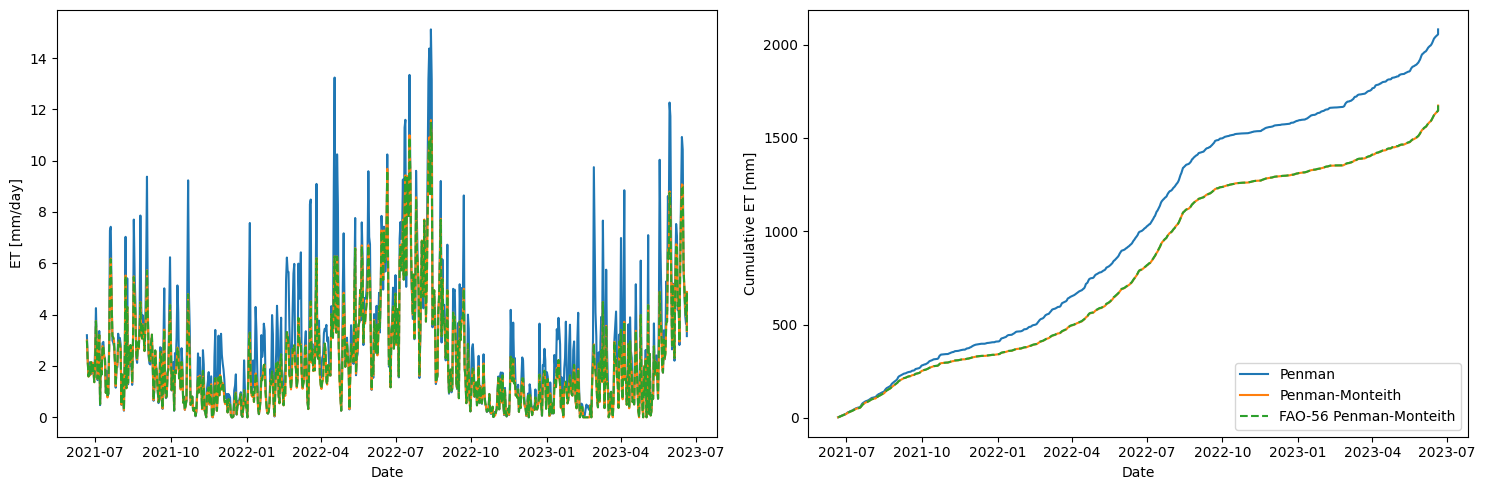

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5), ncols=2)

ax[0].plot(df['penman'], label = "Penman")
ax[0].plot(df['penman-monteith'],label="Penman-Monteith")
ax[0].plot(df['fao56'], '--', label="FAO-56 Penman-Monteith")
ax[0].set_ylabel("ET [mm/day]")

ax[1].plot(df['penman'].cumsum(), label="Penman")
ax[1].plot(df['penman-monteith'].cumsum(), label="Penman-Monteith")
ax[1].plot(df['fao56'].cumsum(), '--', label="FAO-56 Penman-Monteith")
ax[1].set_ylabel("Cumulative ET [mm]")
ax[1].legend(loc=4, fontsize=10)

for i in (0,1):
    ax[i].set_xlabel("Date")


plt.tight_layout()

# Save plot
# plt.savefig("NEU_evap.png")

plt.show()

We can now store the results in a spreadsheet (.csv) format.

In [7]:
#df.to_csv('NEU_evap.csv')